In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

sys.path.append("..")

from src.features import multitable_merge
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
data = multitable_merge("../data")

<IPython.core.display.Javascript object>

### Correlation analysis

In [5]:
corr = data["train"].corr()
label_corr = corr["TARGET"].iloc[2:].sort_values()
label_corr = label_corr[~label_corr.isnull()]
label_corr = pd.concat([label_corr.iloc[:10], label_corr.iloc[-10:]])

<IPython.core.display.Javascript object>

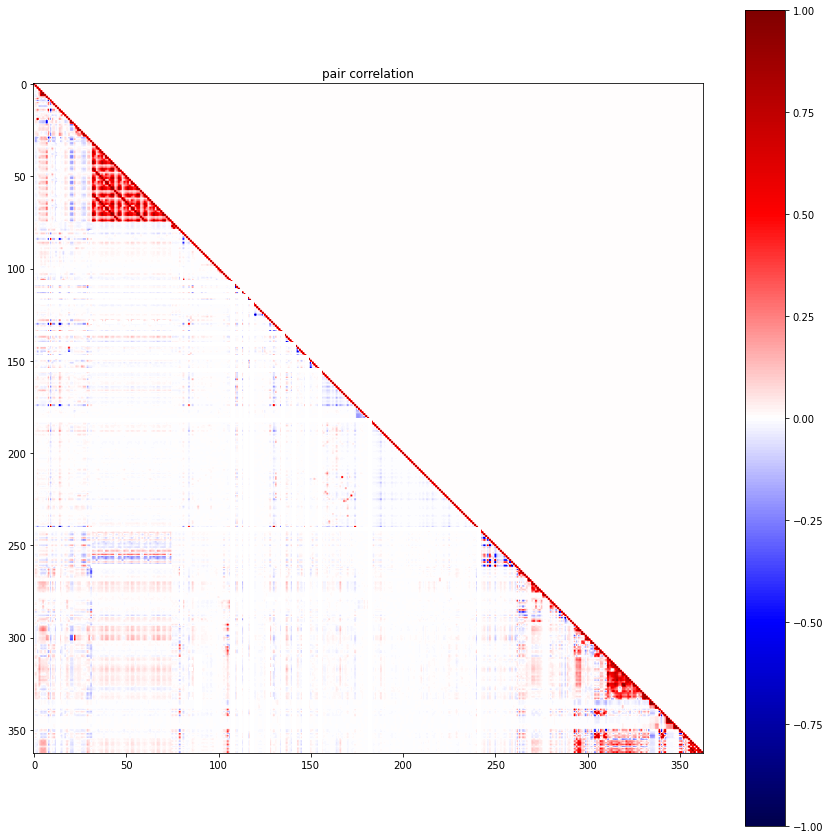

<IPython.core.display.Javascript object>

In [17]:
plt.figure(figsize=(15, 15))
plt.imshow(np.tril(corr), cmap="seismic")
plt.title("pair correlation")
plt.colorbar()
plt.show()

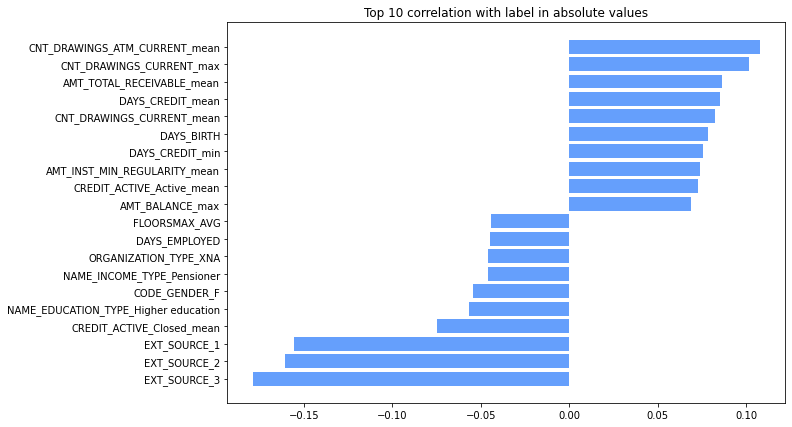

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [6]:
plt.figure(figsize=(10, 7))
plt.barh(range(len(label_corr)), label_corr, color="#659ffc")
plt.yticks(range(len(label_corr)), label_corr.index, rotation=0)
plt.title("Top 10 correlation with label in absolute values")
plt.show()
plt.tight_layout()

### Distributional plot

separated by class. The more distinct the shapes look, the more distinguishing the feature is

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


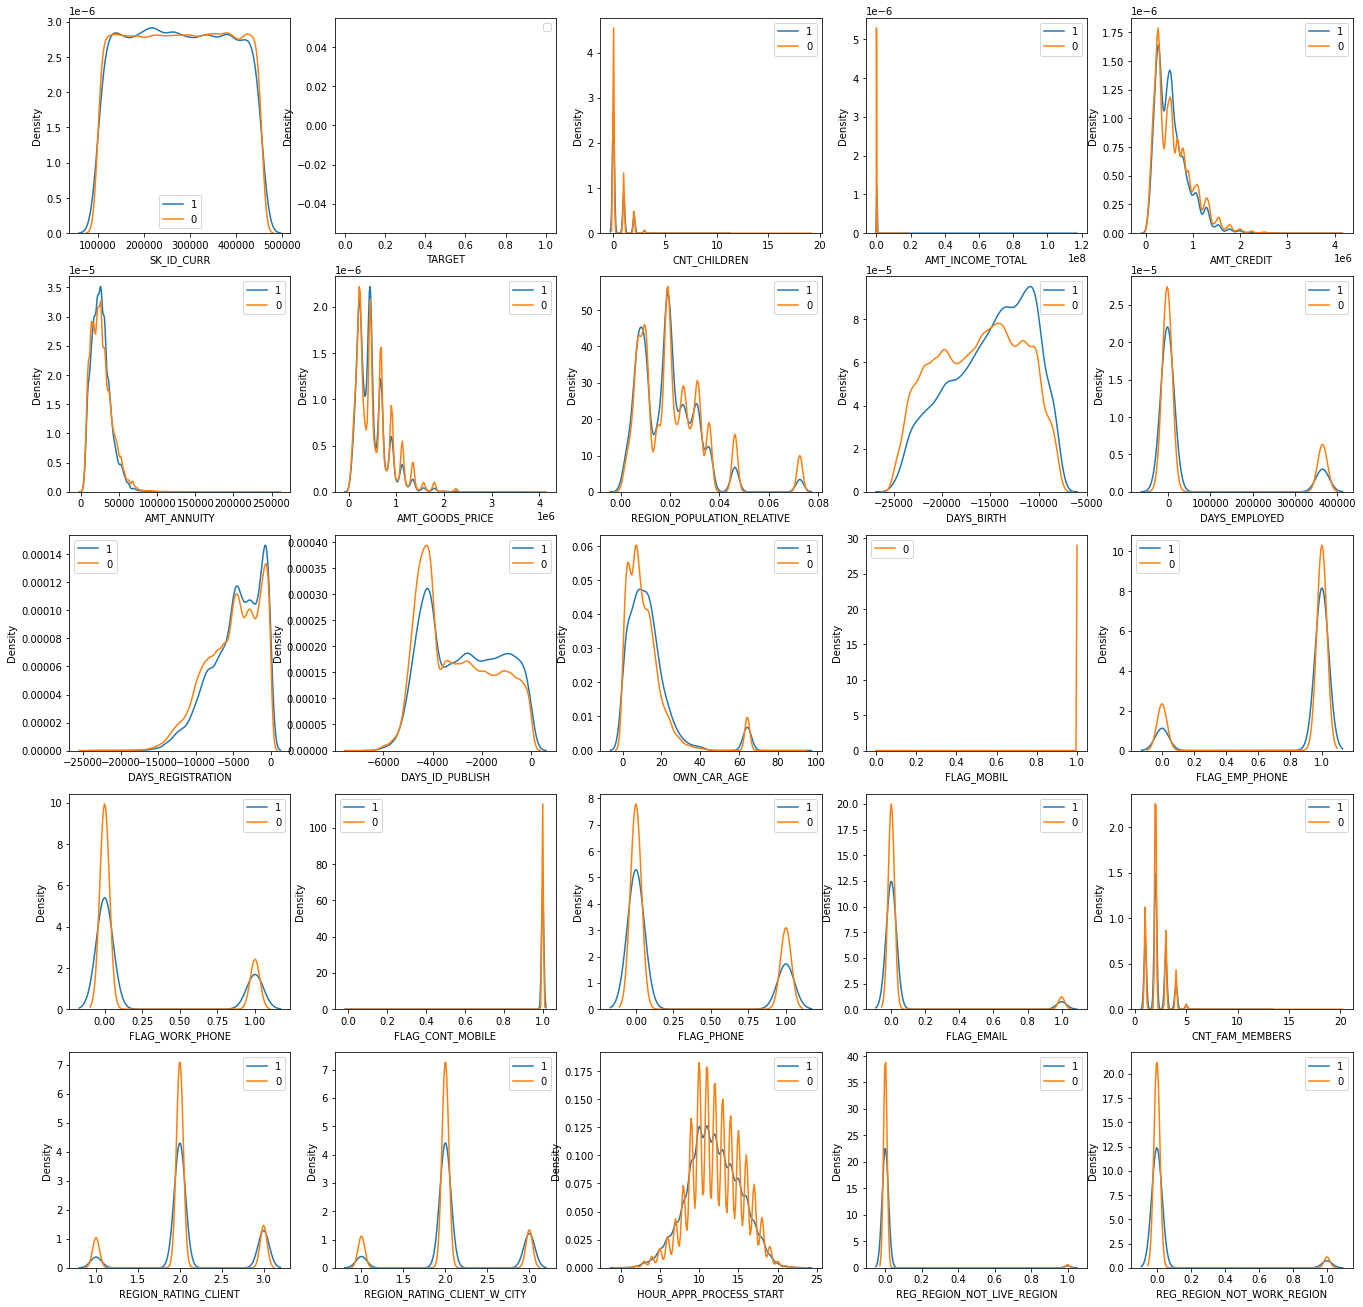

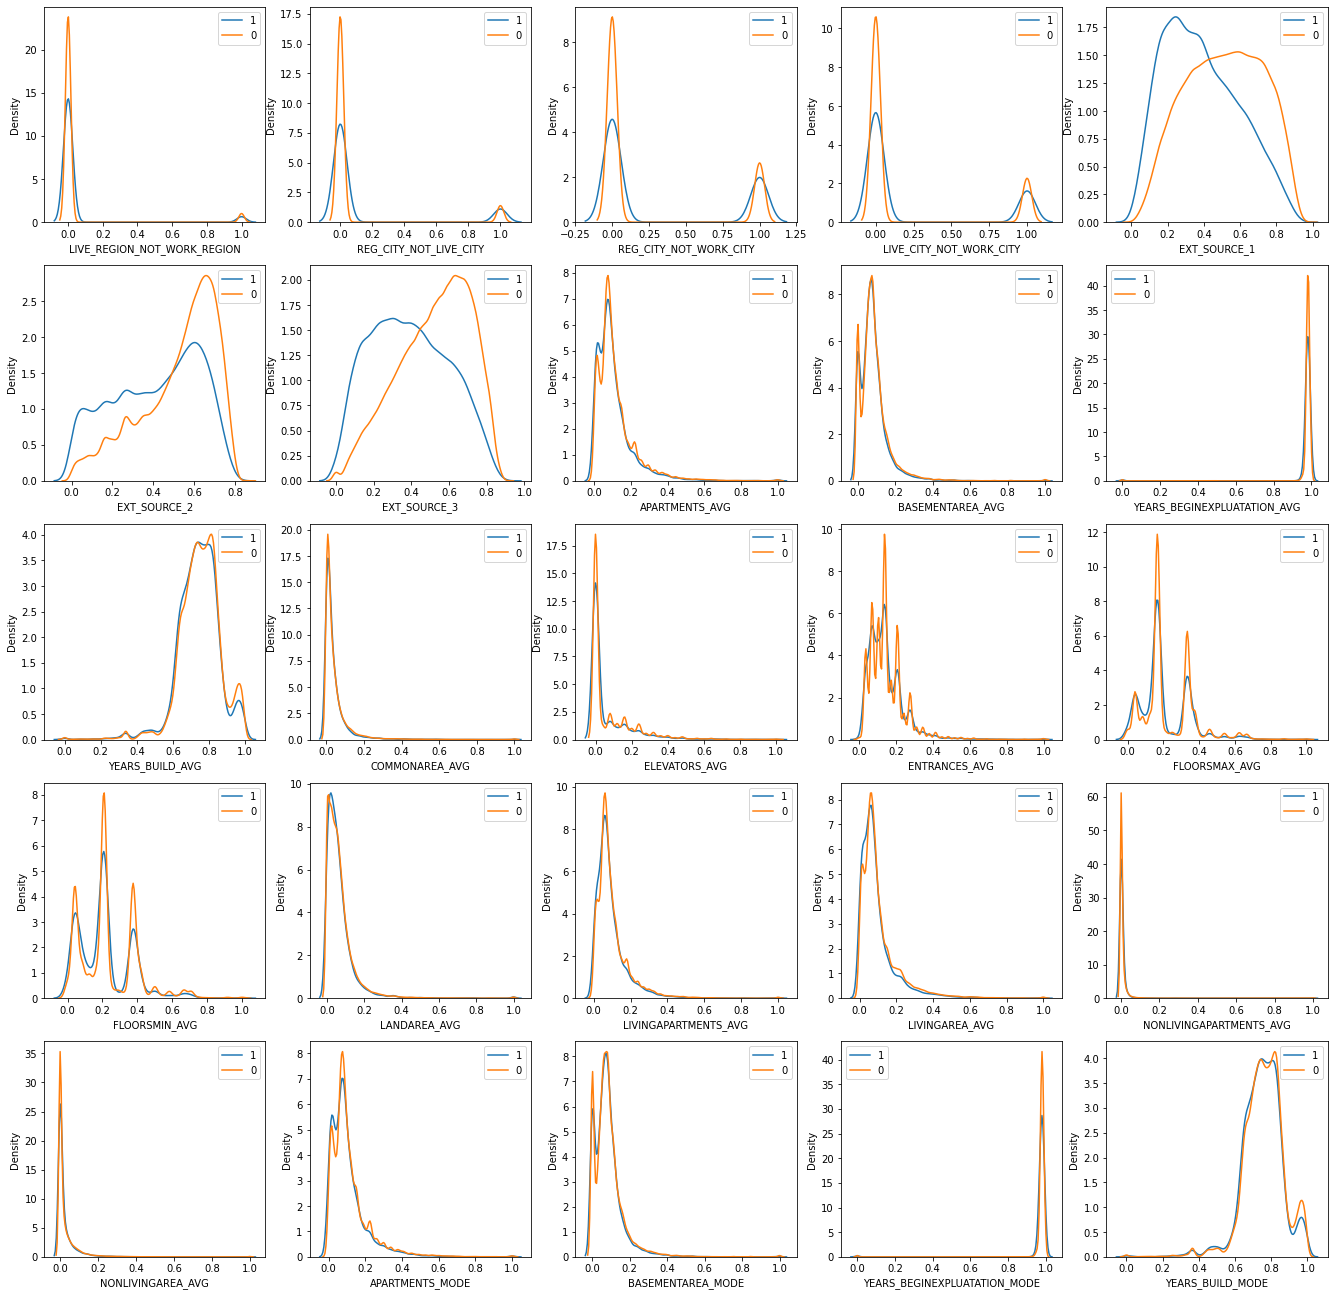

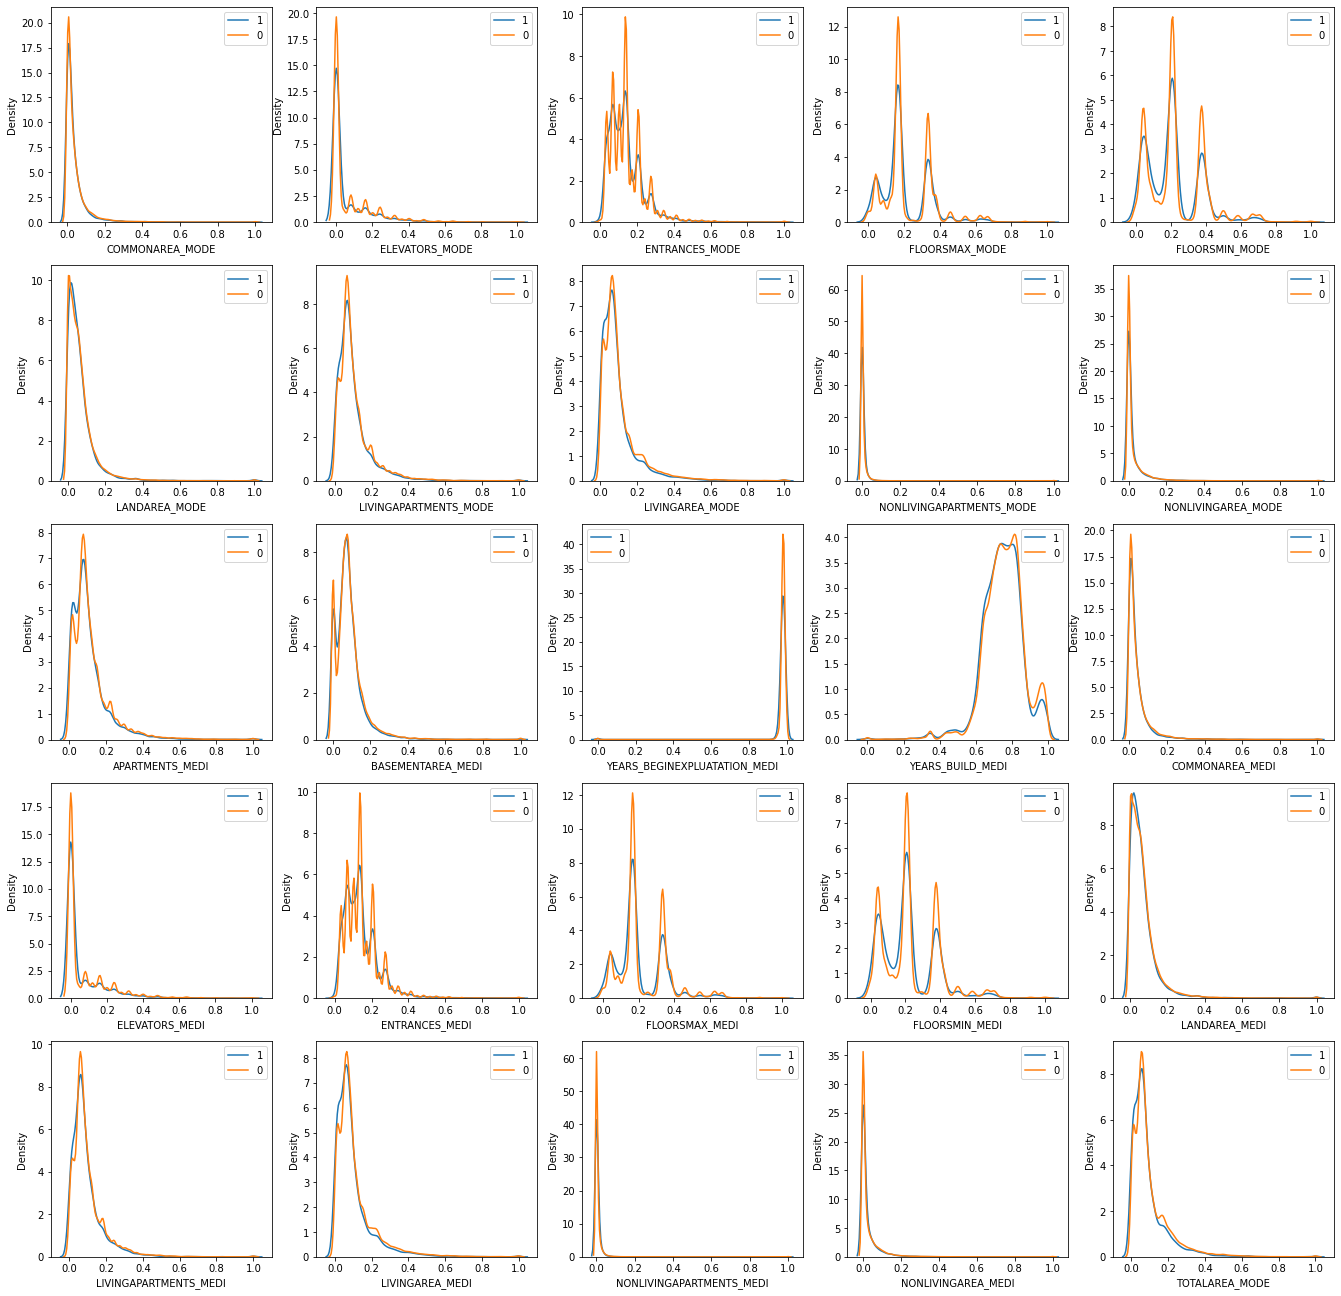

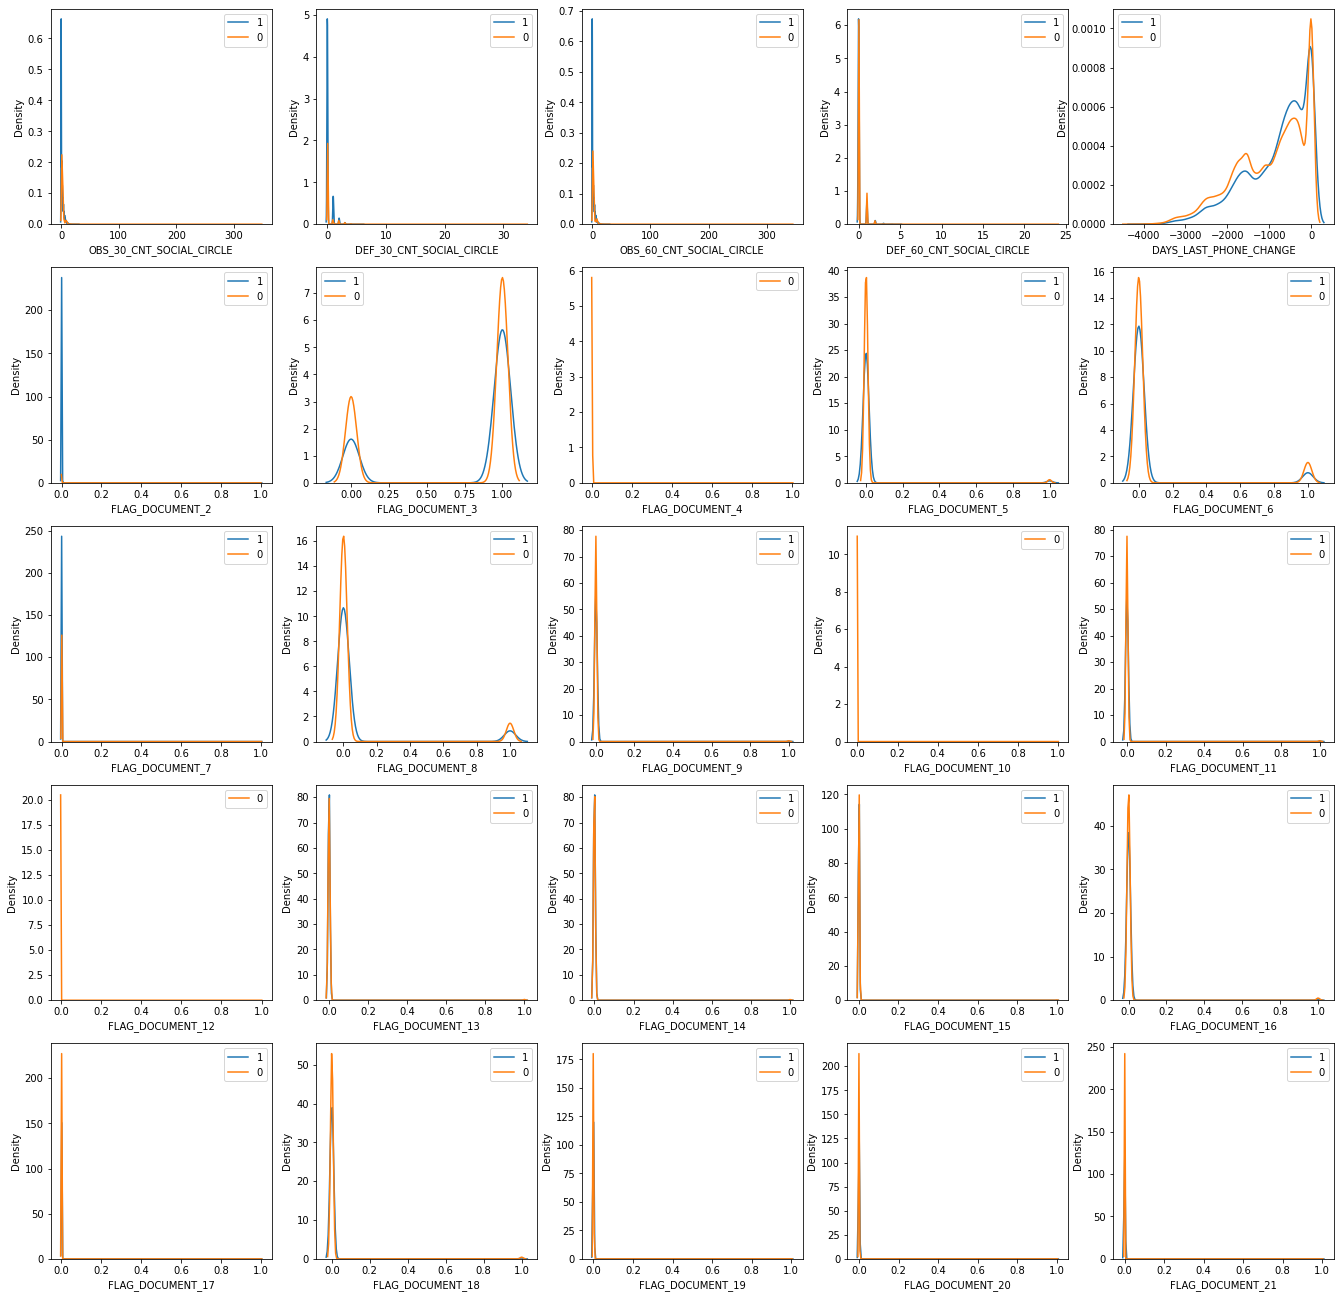

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


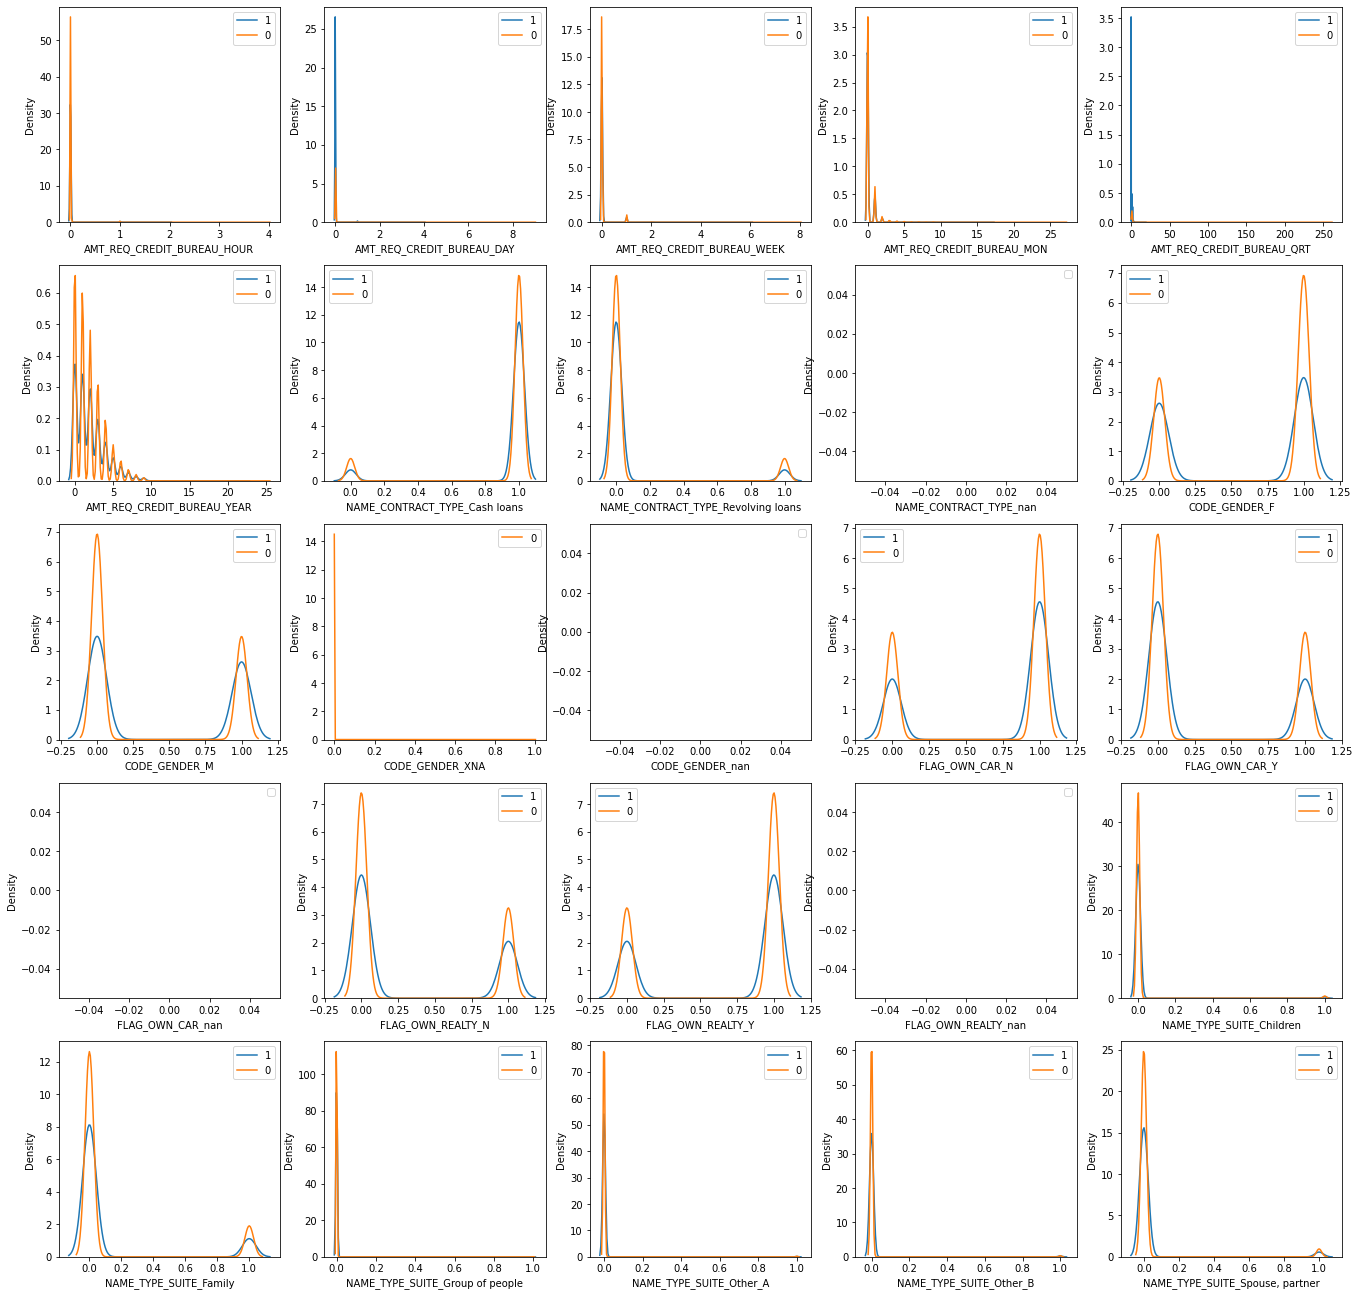

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


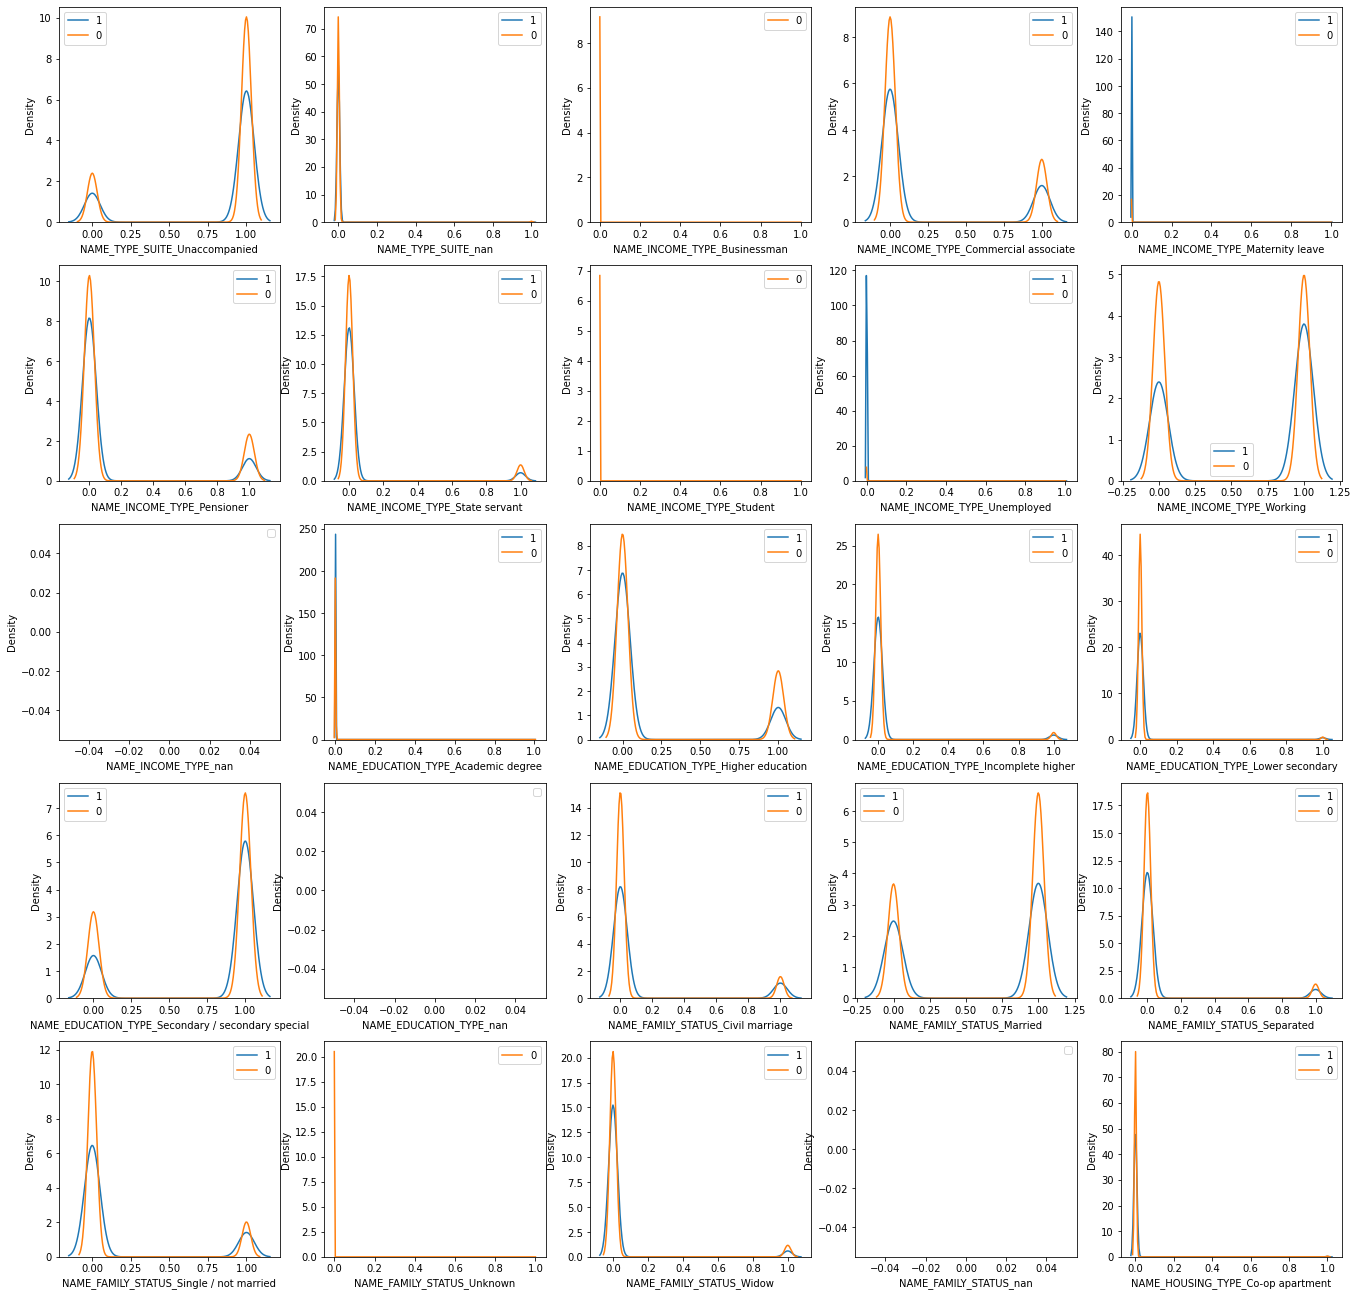

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


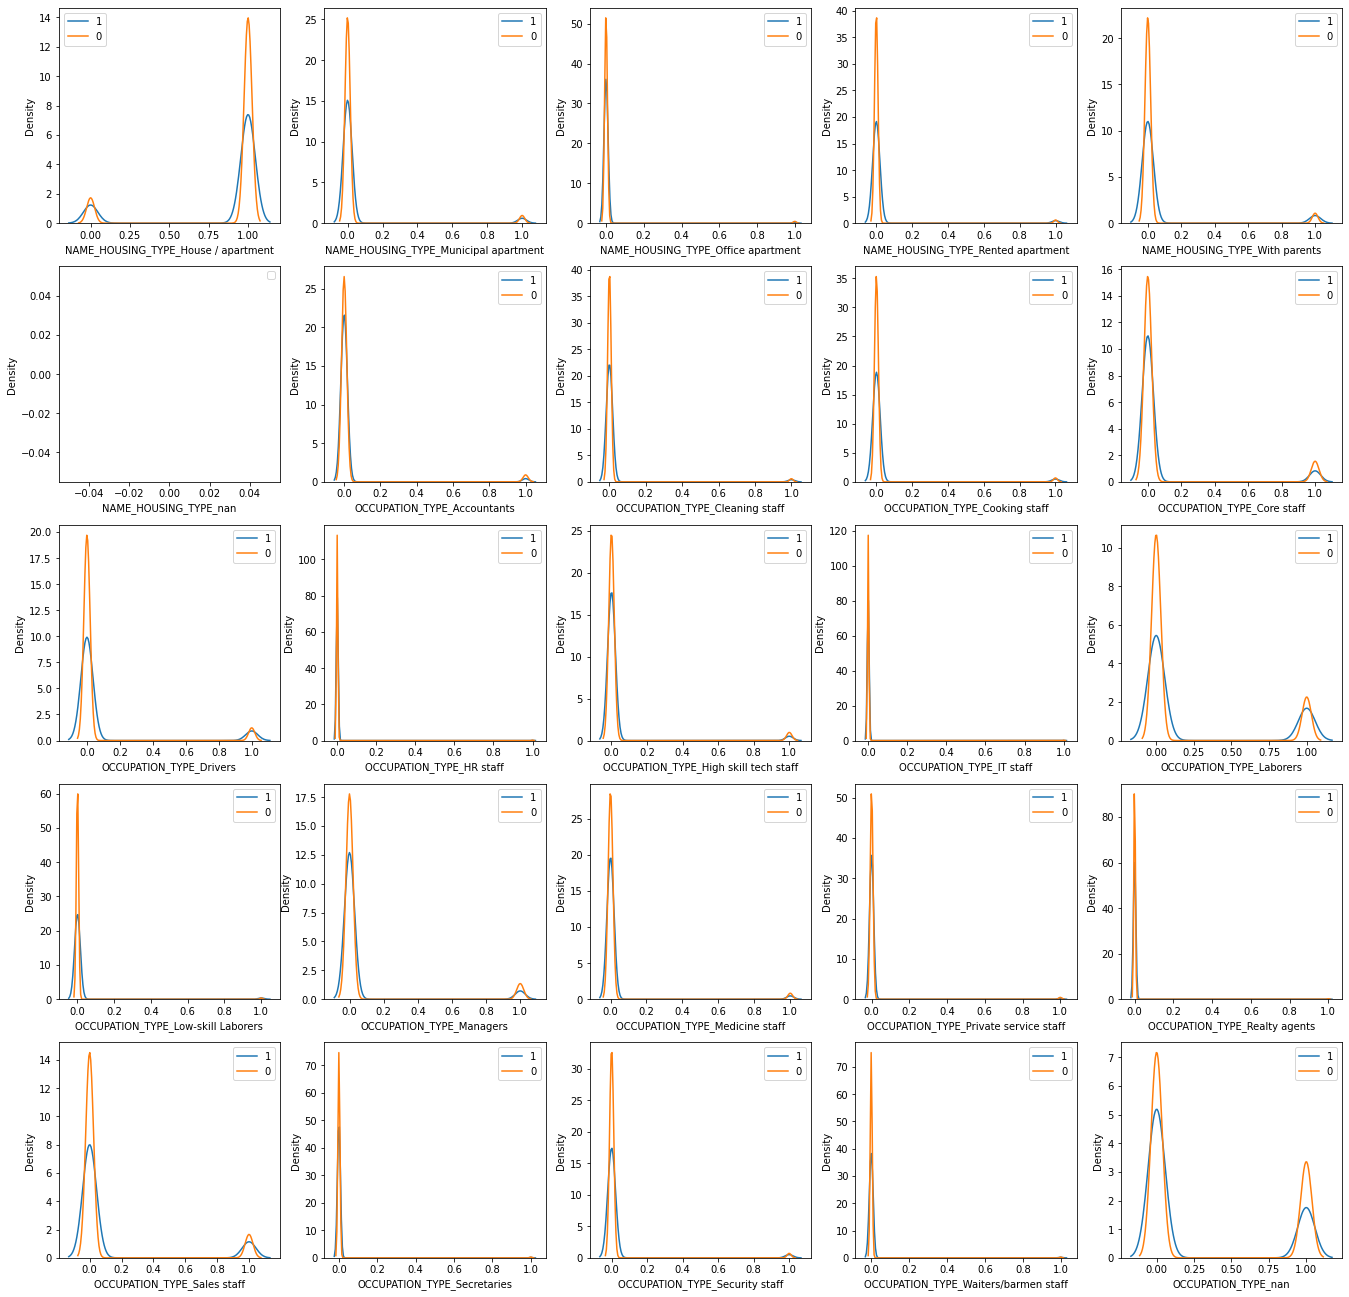

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


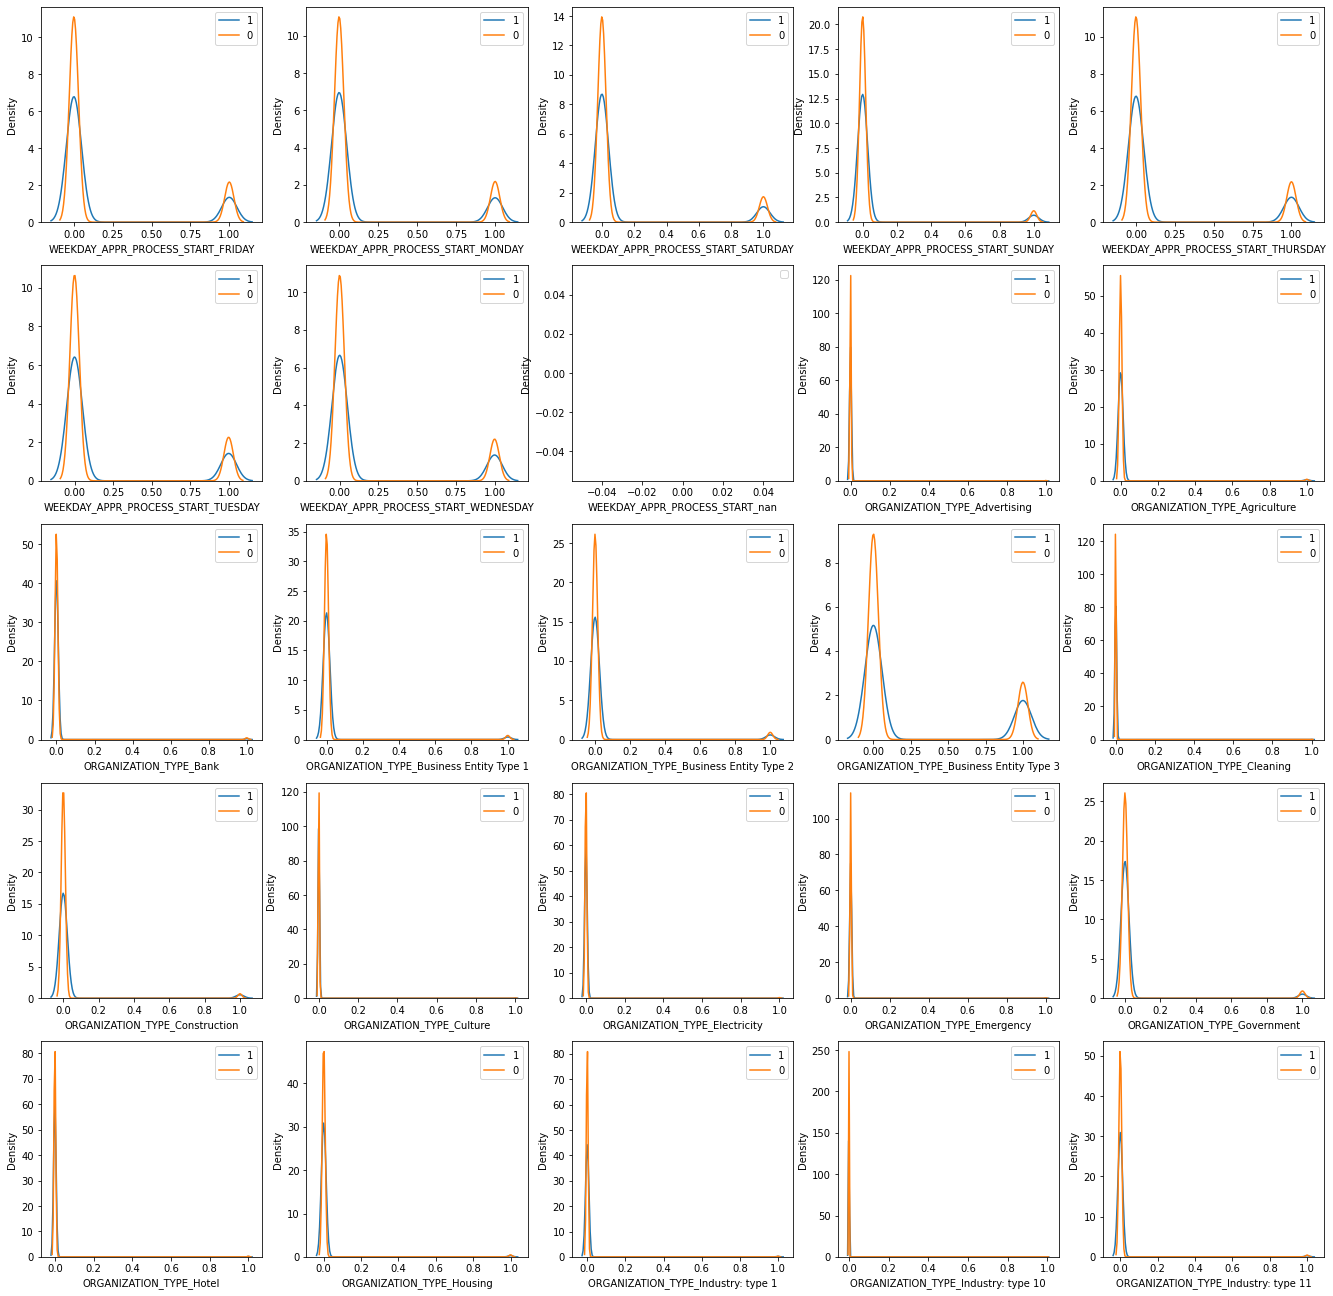

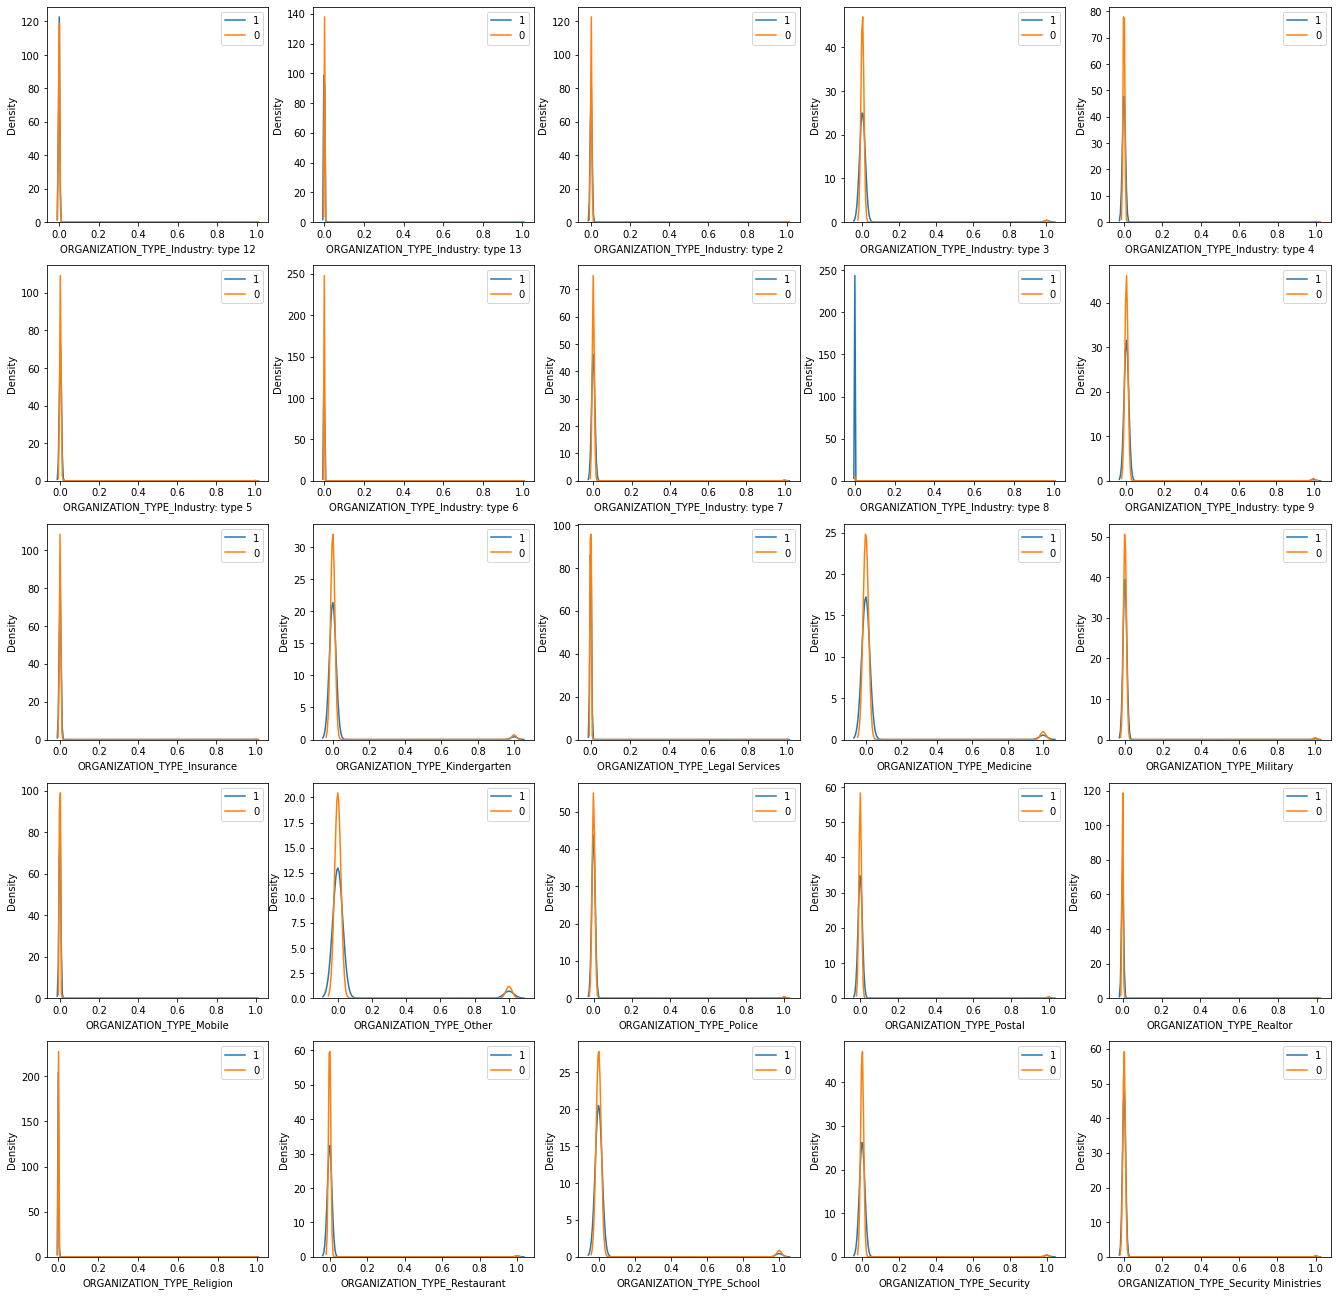

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


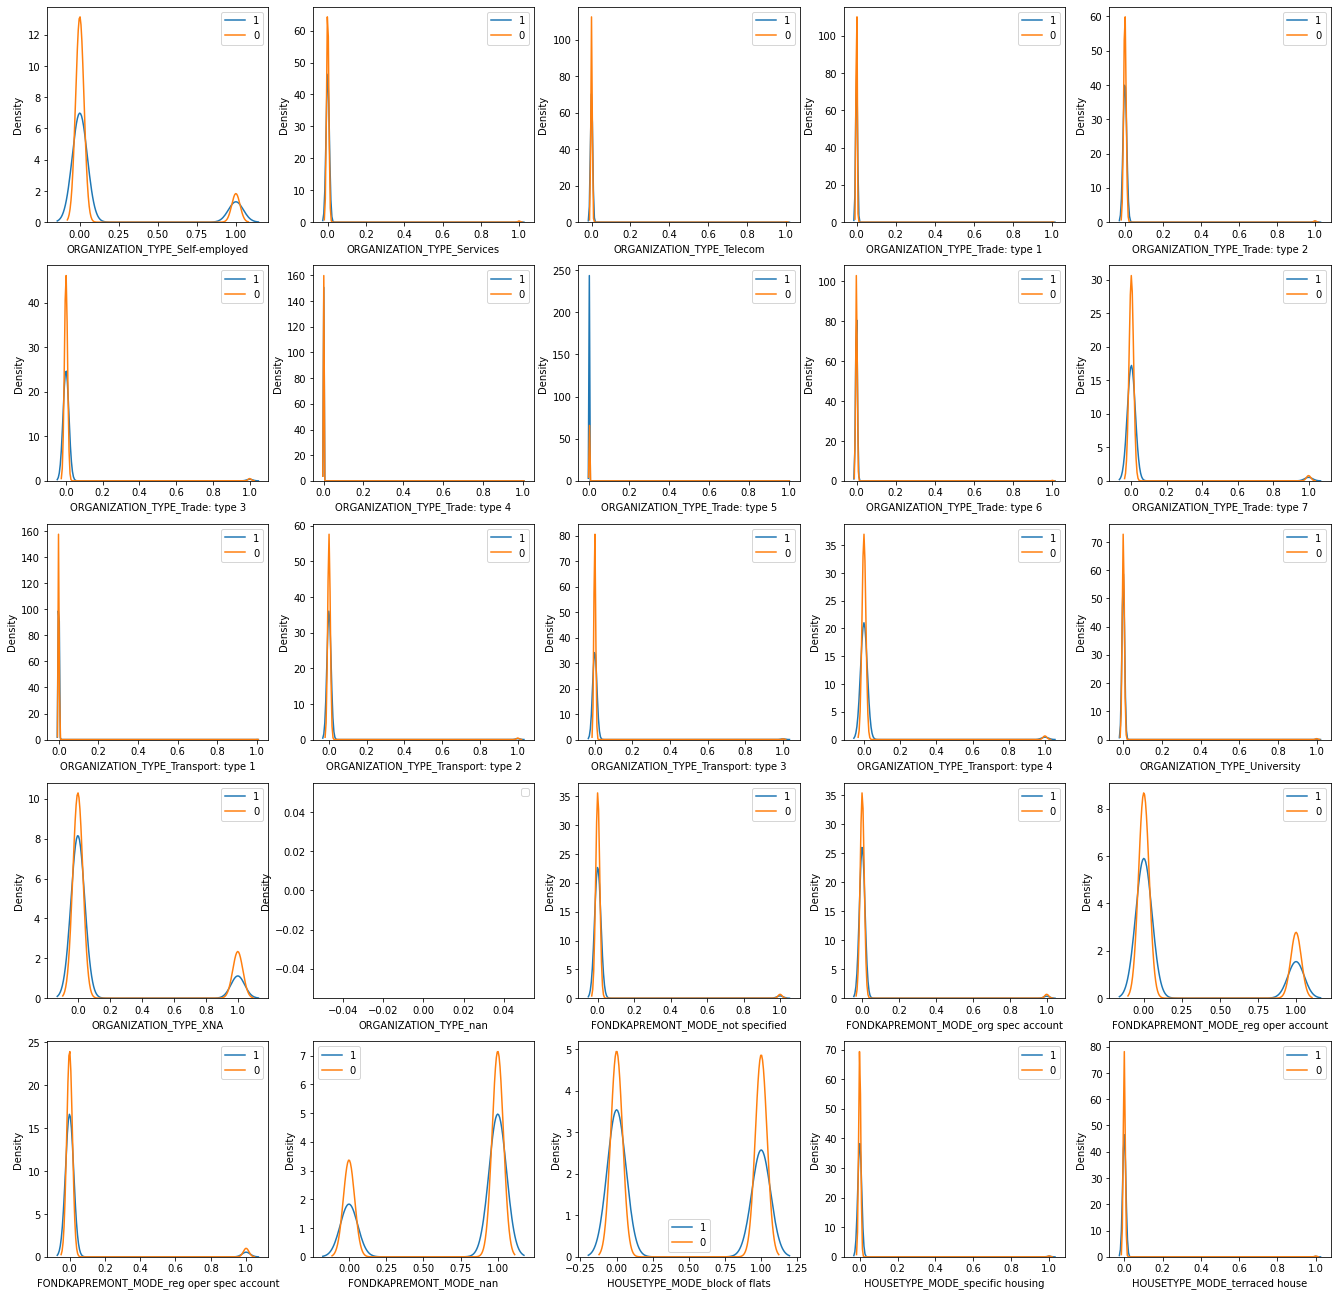

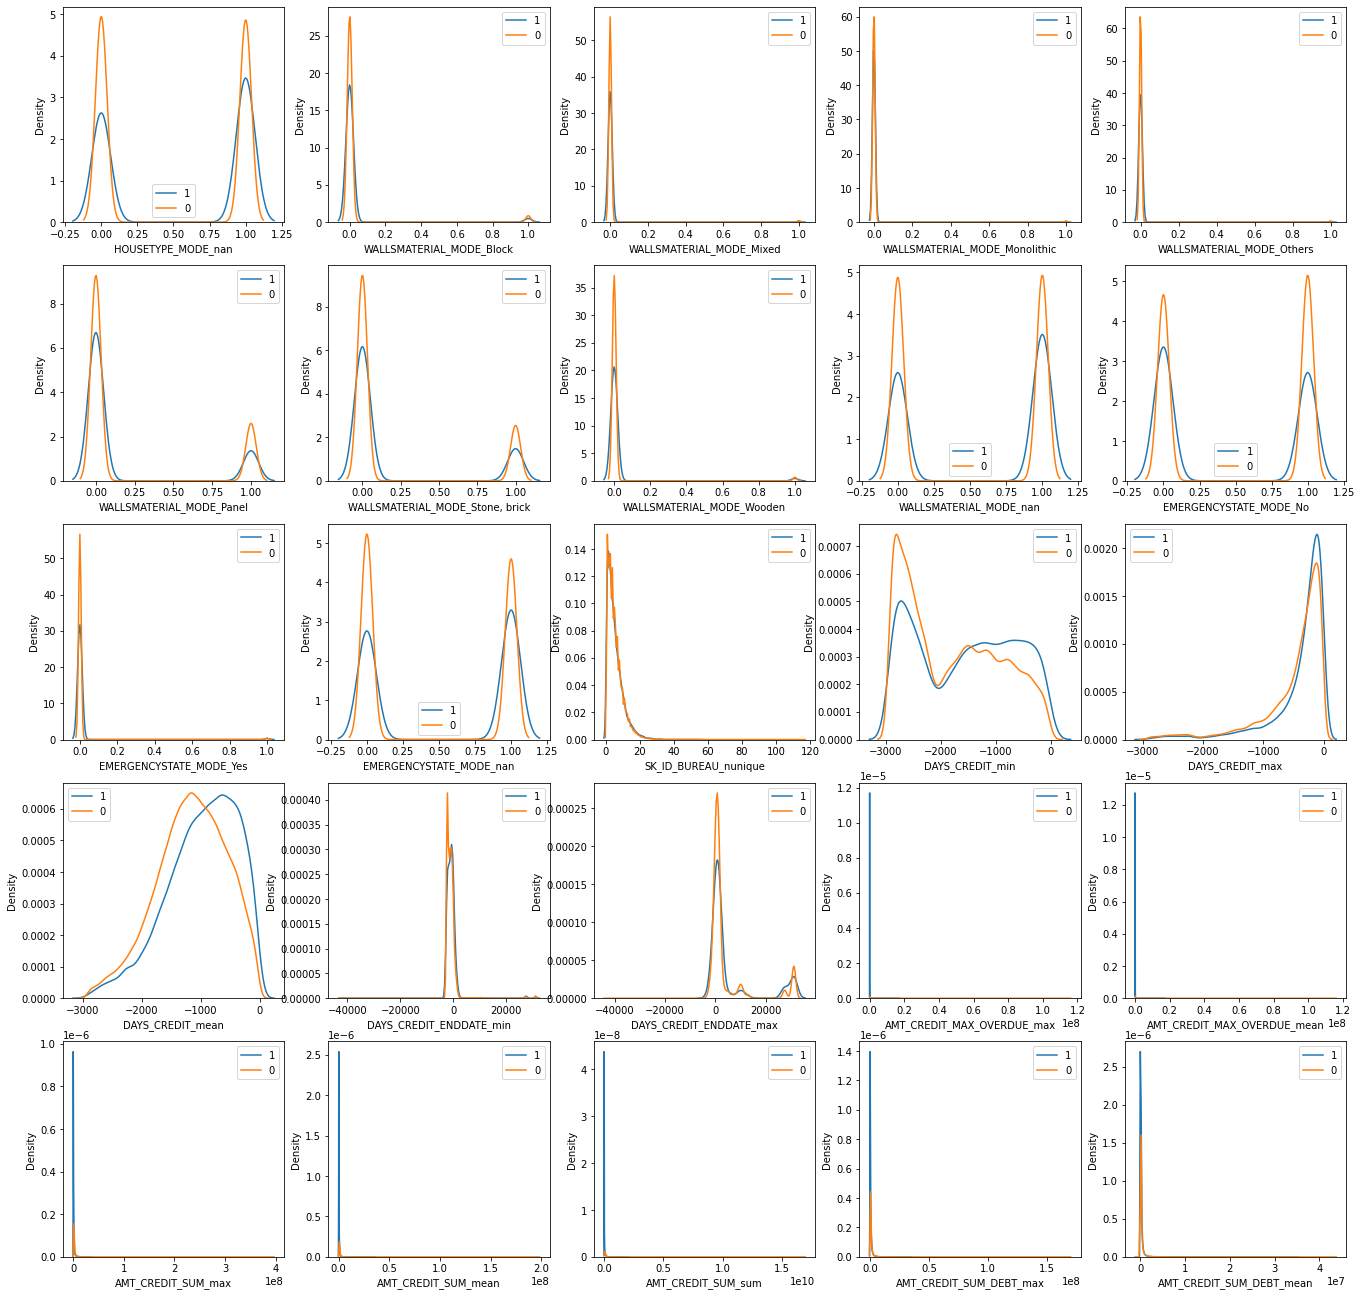

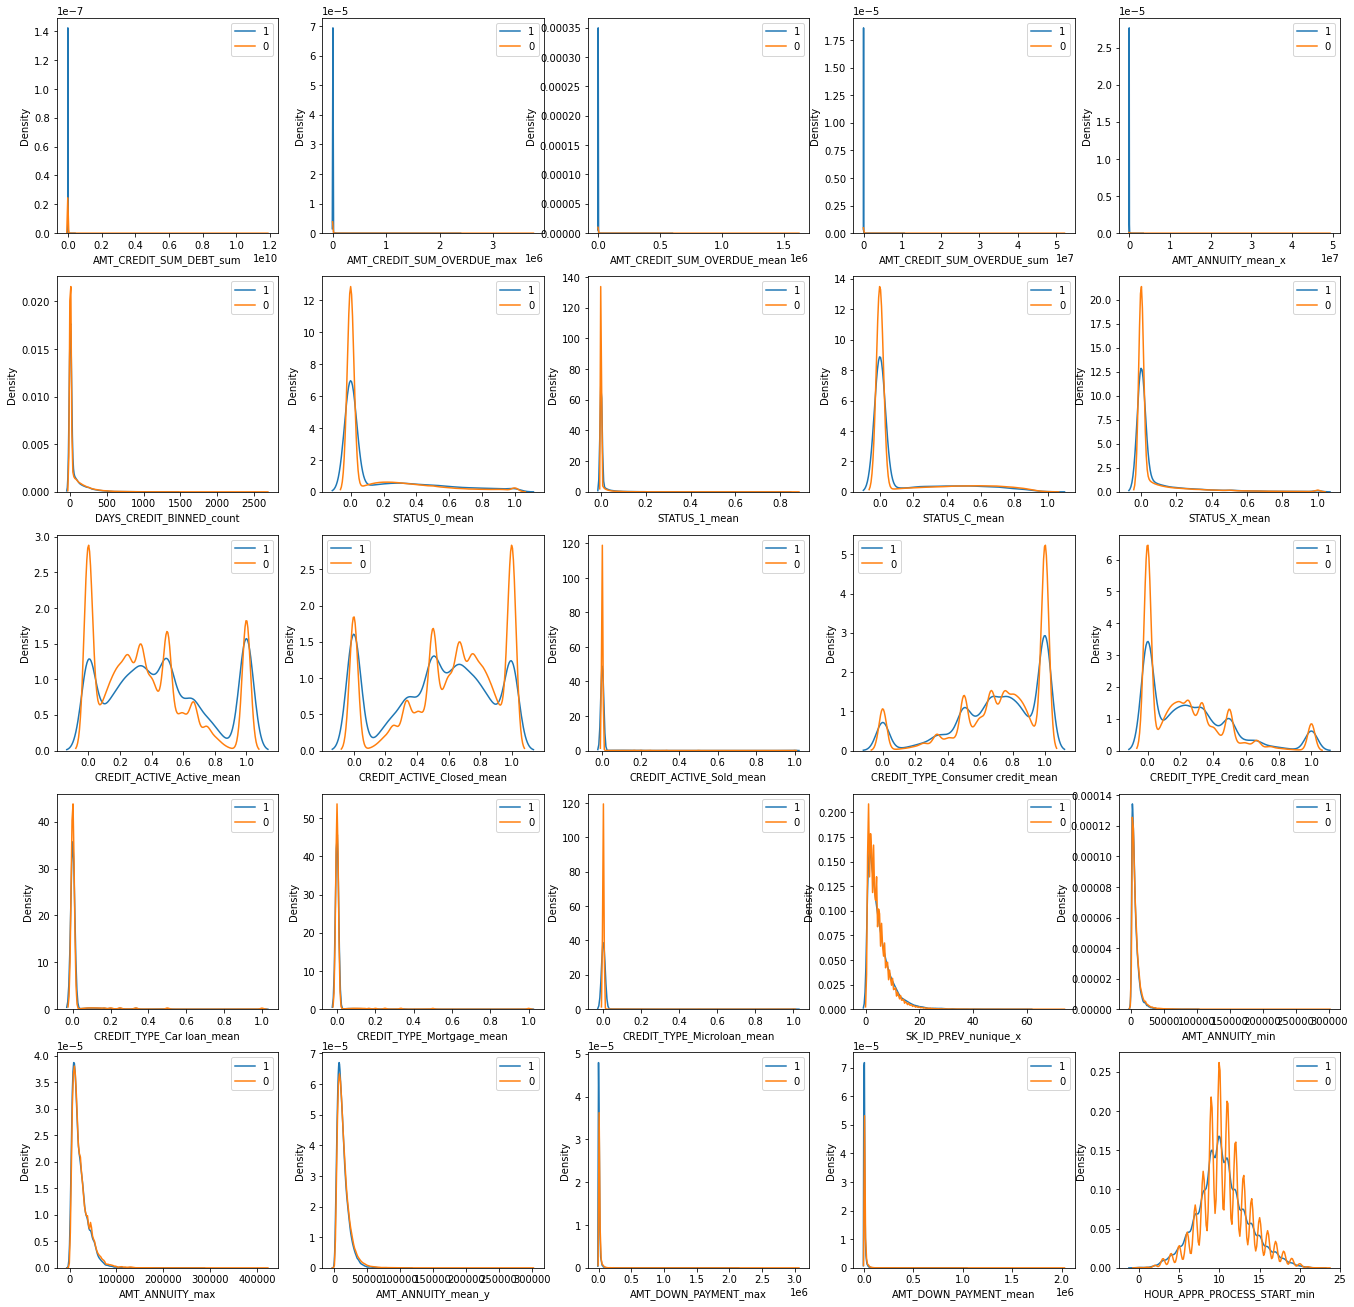

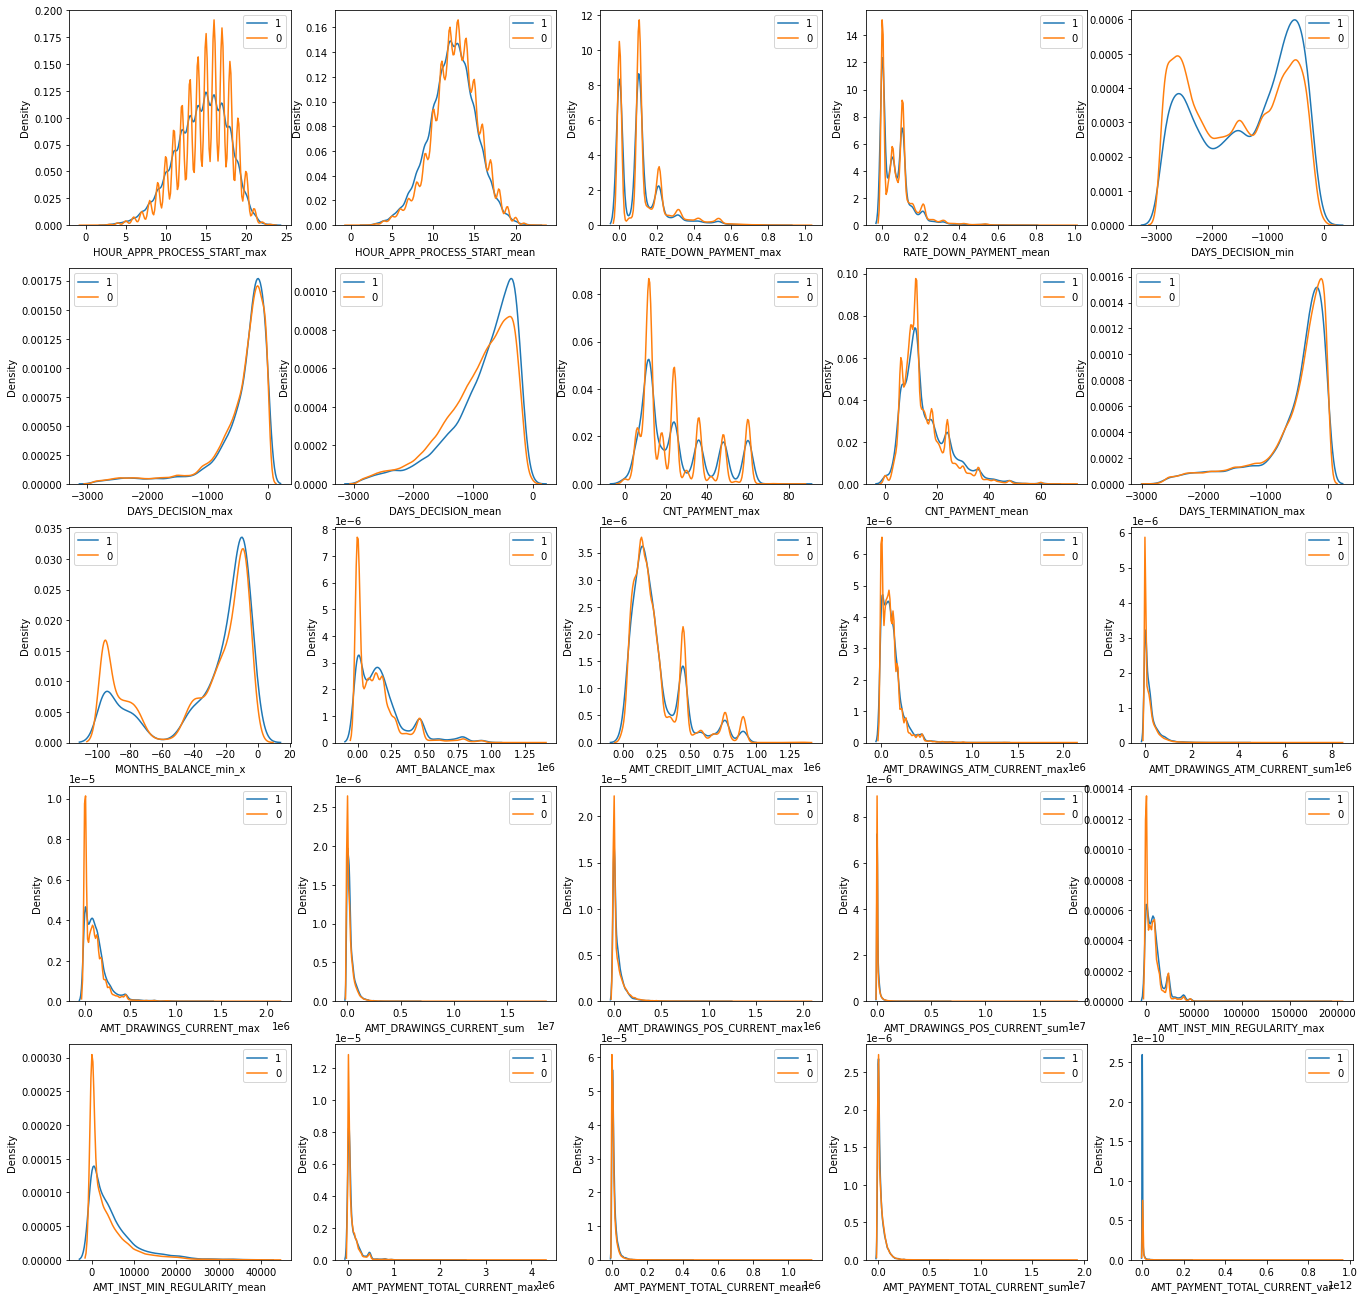

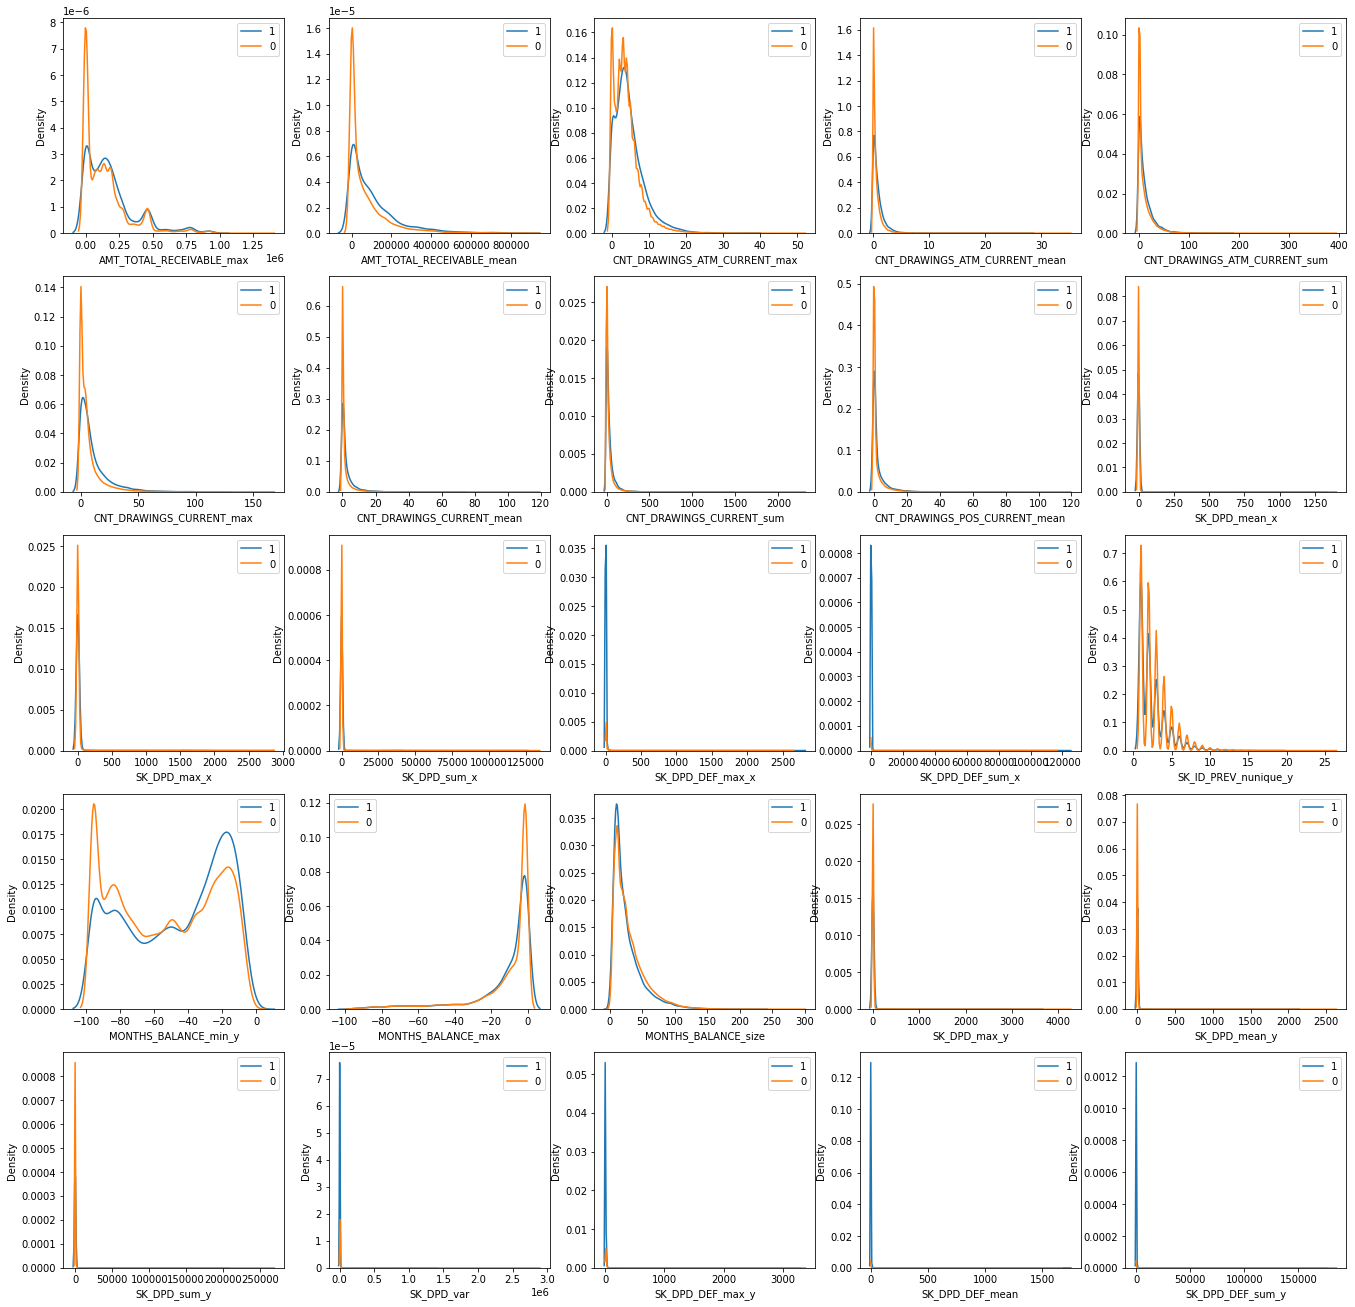

<IPython.core.display.Javascript object>

In [18]:
n_col = len(data["train"].columns)
r, c = 5, 5

# i = 0
for i in range(n_col // (r * c)):
    fig = plt.figure(figsize=(23, 23))
    for j in range(r * c):
        name = data["train"].columns[i * r * c + j]
        current_col = data["train"].groupby("TARGET")[name]

        fig.add_subplot(r, c, j + 1)
        sns.distplot(
            data["train"][data["train"]["TARGET"] == 1][name], hist=False, label="1"
        )
        sns.distplot(
            data["train"][data["train"]["TARGET"] == 0][name], hist=False, label="0"
        )
        plt.legend()
    plt.show()
    print("=" * 100)